In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# built in python modules
import datetime
import logging
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

In [2]:
import pvlib
pvlib_abspath = os.path.dirname(os.path.abspath(inspect.getfile(pvlib)))

In [3]:
tmy3_data, tmy3_metadata = pvlib.tmy.readtmy3(os.path.join(pvlib_abspath, 'data', '703165TY.csv'))
tmy2_data, tmy2_metadata = pvlib.tmy.readtmy2(os.path.join(pvlib_abspath, 'data', '12839.tm2'))

In [4]:
print(tmy3_metadata)
tmy3_data.head(25)

{'TZ': -9.0, 'Name': '"SAND POINT"', 'altitude': 7.0, 'USAF': 703165, 'longitude': -160.517, 'State': 'AK', 'latitude': 55.317}


,ETR,ETRN,GHI,GHISource,GHIUncertainty,DNI,DNISource,DNIUncertainty,DHI,DHISource,...,AOD,AODSource,AODUncertainty,Alb,AlbSource,AlbUncertainty,Lprecipdepth,Lprecipquantity,LprecipSource,LprecipUncertainty
datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-01 01:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 02:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 03:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 04:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 05:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 06:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 07:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 08:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 09:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0


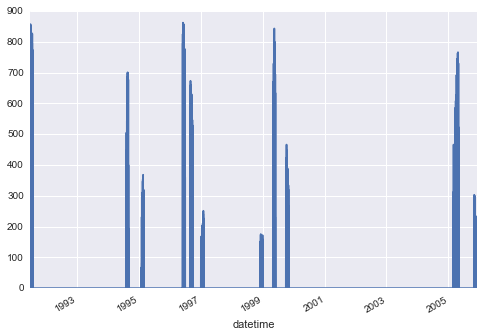

In [5]:
tmy3_data['GHI'].plot()

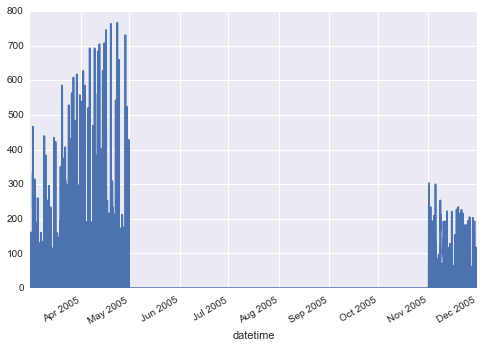

In [6]:
tmy3_data['GHI'][tmy3_data.index > '2005-01-01'].plot()

In [7]:
print(tmy2_metadata)
print(tmy2_data.head())

{'City': 'MIAMI', 'TZ': -5, 'altitude': 2.0, 'longitude': -80.26666666666667, 'State': 'FL', 'WBAN': '12839', 'latitude': 25.8}
                           year  month  day  hour  ETR  ETRN  GHI GHISource  \
1962-01-01 00:00:00-05:00    62      1    1     1    0     0    0         ?   
1962-01-01 01:00:00-05:00    62      1    1     2    0     0    0         ?   
1962-01-01 02:00:00-05:00    62      1    1     3    0     0    0         ?   
1962-01-01 03:00:00-05:00    62      1    1     4    0     0    0         ?   
1962-01-01 04:00:00-05:00    62      1    1     5    0     0    0         ?   

                           GHIUncertainty  DNI          ...            \
1962-01-01 00:00:00-05:00               0    0          ...             
1962-01-01 01:00:00-05:00               0    0          ...             
1962-01-01 02:00:00-05:00               0    0          ...             
1962-01-01 03:00:00-05:00               0    0          ...             
1962-01-01 04:00:00-05:00       

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [8]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, pvlib

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.15.2
pvlib 0.2.0dev
Wed Jun 24 21:25:44 2015 South Africa Standard Time